In [18]:
### Reference: https://www.youtube.com/watch?v=QIUxPv5PJOY

In [19]:
#import the libraries
!pip install pandas_datareader
!pip install keras
!pip install tensorflow
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [20]:
#pip list #check the list of software within pip

In [49]:
#get the stock quote
df = web.DataReader('AAPL', data_source='yahoo',start='2019-01-01', end='2022-01-31')

In [50]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,39.840000,39.119999,39.632500,39.435001,140014000.0,38.233898
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.277527
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.464798
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,35.936077
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,35.856094
...,...,...,...,...,...,...
2022-01-25,162.759995,157.020004,158.979996,159.779999,115798400.0,159.576691
2022-01-26,164.389999,157.820007,163.500000,159.690002,108275300.0,159.486801
2022-01-27,163.839996,158.279999,162.449997,159.220001,121954600.0,159.017410


In [51]:
df.shape 

(778, 6)

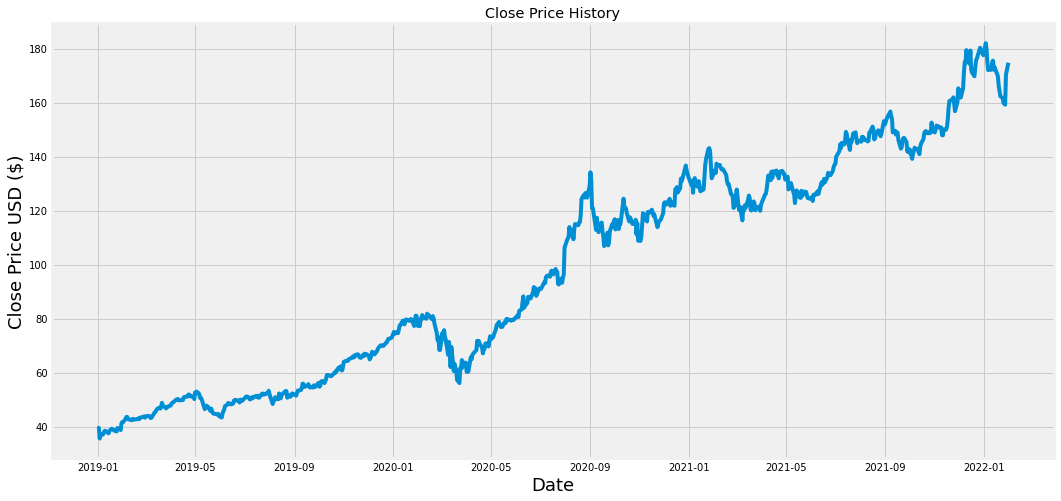

In [52]:
#visulize the closing price history
plt.figure(figsize = (16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize =18)
plt.show()

In [53]:
#new dataframe with only the 'close column'
df_close = df.filter(['Close'])

#convert dataframe to numpy
dataset = df_close.values

In [54]:
training_data_len = math.ceil(len(dataset)* .8) #80% of the data to be training data
training_data_len

623

In [55]:
#scale data before using neutron network
scaler = MinMaxScaler (feature_range =(0,1))
scaled_data = scaler.fit_transform(dataset)

In [56]:
scaled_data

array([[0.02654264],
       [0.02684987],
       [0.        ],
       [0.010361  ],
       [0.00979771],
       [0.01461125],
       [0.01898096],
       [0.01981736],
       [0.01723989],
       [0.01333105],
       [0.01857132],
       [0.02176325],
       [0.02333362],
       [0.02497227],
       [0.0189639 ],
       [0.02002218],
       [0.01793974],
       [0.02657676],
       [0.02408467],
       [0.02131943],
       [0.03936161],
       [0.04139285],
       [0.04152941],
       [0.04960314],
       [0.05460441],
       [0.05470684],
       [0.049074  ],
       [0.04816933],
       [0.04649653],
       [0.04898865],
       [0.04777672],
       [0.04883503],
       [0.04818639],
       [0.04905691],
       [0.05093454],
       [0.04927882],
       [0.05253905],
       [0.05468976],
       [0.05486046],
       [0.05578219],
       [0.05284628],
       [0.05595289],
       [0.05745499],
       [0.05690876],
       [0.05518478],
       [0.05173679],
       [0.05243663],
       [0.062

In [57]:
#create the training data set
train_data = scaled_data[0:training_data_len, :]

#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(100,len(train_data)):
    x_train.append(train_data[i-100:i, 0])
    y_train.append(train_data[i, 0])
    if i <=101:
        print(x_train)
        print(y_train)
        print()

[array([0.02654264, 0.02684987, 0.        , 0.010361  , 0.00979771,
       0.01461125, 0.01898096, 0.01981736, 0.01723989, 0.01333105,
       0.01857132, 0.02176325, 0.02333362, 0.02497227, 0.0189639 ,
       0.02002218, 0.01793974, 0.02657676, 0.02408467, 0.02131943,
       0.03936161, 0.04139285, 0.04152941, 0.04960314, 0.05460441,
       0.05470684, 0.049074  , 0.04816933, 0.04649653, 0.04898865,
       0.04777672, 0.04883503, 0.04818639, 0.04905691, 0.05093454,
       0.04927882, 0.05253905, 0.05468976, 0.05486046, 0.05578219,
       0.05284628, 0.05595289, 0.05745499, 0.05690876, 0.05518478,
       0.05173679, 0.05243663, 0.06266108, 0.06609201, 0.06745755,
       0.07090551, 0.07498506, 0.07822822, 0.0756849 , 0.07846719,
       0.09029614, 0.08340019, 0.07945721, 0.07612869, 0.07899633,
       0.07942306, 0.08152257, 0.08372451, 0.08846975, 0.09073996,
       0.09132031, 0.09355637, 0.09884784, 0.09782367, 0.09973542,
       0.09688486, 0.09674831, 0.0973628 , 0.09739694, 0.1040

In [58]:
#convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [59]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape #LSTM require 3 dimensional

(523, 100, 1)

In [60]:
#Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [61]:
#compile the model
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [62]:
#train the model #epochs is the no of literations to and back
model.fit(x_train, y_train, batch_size =1, epochs=1)

523/523 [==============================] - 12s 21ms/step - loss: 0.0041


In [63]:
#create the testing dataset -> new array with scaled values from 
#index 1722 (training_data_len minus i) to 2182

test_data = scaled_data[training_data_len - 100: , :]

x_test= []
y_test= dataset[training_data_len:, :] #predicted values

for i in range(100, len(test_data)):
    x_test.append(test_data[i-100:i, 0])


In [64]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [65]:
#reshape the data into 3D for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [66]:
#get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) 

#un-scaling the values, predictions to be same values as y_test (based on x_test dataset)

In [67]:
#Root mean squared error (RMSE) - accuracy of the model and standard deviation of residuals
#lower RMSE indicate a better fit
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2.082705590032762

<ipython-input-74-44d276b9caf3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


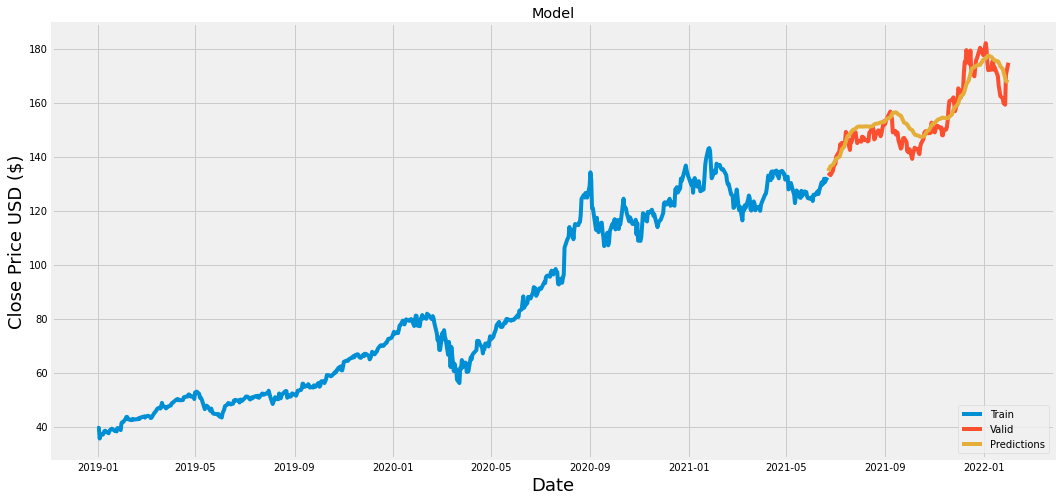

In [74]:
#plot the data
train = df_close[:training_data_len]
valid = df_close[training_data_len:]

valid['Predictions'] = predictions

#visulisation the data
plt.figure(figsize =(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize =18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Valid', 'Predictions'], loc='lower right')
plt.show()

In [69]:
#showing the valid and predicted prices
valid


,Close,Predictions
Date,,
2021-06-22,133.979996,134.651443
2021-06-23,133.699997,135.245087
2021-06-24,133.410004,135.850281
2021-06-25,133.110001,136.423019
2021-06-28,134.779999,136.932953
...,...,...
2022-01-25,159.779999,171.429123
2022-01-26,159.690002,170.288239
2022-01-27,159.220001,169.142975


In [70]:
#predict AAPL closing price
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end= '2022-02-10')

In [71]:
#create a new dataframe
new_df = apple_quote.filter(['Close'])
#get the last 60 days closing price values and convert the DF to an array
last_100 = new_df[-100:].values
#scale the data to be values between 0 and 1
last_100_scaled = scaler.transform(last_100)
#create an empty list
X_test = []
#append the past 100 days 
X_test.append(last_100_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#reshape the data to 3D
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#get the predicted scaled price
pred_price = model.predict(X_test)
#undo the sclaing
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[172.2877]]


In [75]:
#predict AAPL closing price
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2021-01-21', end= '2021-02-16')

print (apple_quote2['Close'])


Date
2021-01-20    132.029999
2021-01-21    136.869995
2021-01-22    139.070007
2021-01-25    142.919998
2021-01-26    143.160004
2021-01-27    142.059998
2021-01-28    137.089996
2021-01-29    131.960007
2021-02-01    134.139999
2021-02-02    134.990005
2021-02-03    133.940002
2021-02-04    137.389999
2021-02-05    136.759995
2021-02-08    136.910004
2021-02-09    136.009995
2021-02-10    135.389999
2021-02-11    135.130005
2021-02-12    135.369995
2021-02-16    133.190002
Name: Close, dtype: float64
